# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [2]:
# Download the data
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
        

--2019-06-09 11:54:01--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.112.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.07K  96.7KB/s    in 0.2s    

2019-06-09 11:54:02 (96.7 KB/s) - ‘pima-indians-diabetes.csv’ saved [23628/23628]



In [3]:
# check if the data is downloaded
%ls -l

total 1568
-rw-r--r--  1 Polina  staff   12025 Apr  9 10:00 1 Timing Algorithms.ipynb
-rw-r--r--  1 Polina  staff   87427 Apr  7 13:54 1 Timing Algorithms_done.ipynb
-rw-r--r--  1 Polina  staff   42741 May  5 16:51 10 MongoDB-Todo.ipynb
-rw-r--r--  1 Polina  staff    7622 Jun  9 11:53 12_Pima_Indians_Diabetes_TODO.ipynb
-rw-r--r--  1 Polina  staff    7094 Apr 16 10:13 2 Finding values in collections Solution.ipynb
-rw-r--r--  1 Polina  staff    9429 Apr  7 13:53 2 Finding values in collections Todo_done.ipynb
-rw-r--r--  1 Polina  staff   68221 Apr 16 10:13 3 Time Complexity-Solution.ipynb
-rw-r--r--  1 Polina  staff   30348 Apr  9 10:00 3 Time Complexity.ipynb
-rw-r--r--  1 Polina  staff   84914 Apr  9 08:37 3 Time Complexity2.ipynb
-rw-r--r--  1 Polina  staff  124128 Apr  9 08:34 3 Time Complexity_done.ipynb
-rw-r--r--  1 Polina  staff   26470 Apr 22 14:55 4 Decision Trees Solution.ipynb
-rw-r--r--  1 Polina  staff    7162 Apr 16 10:36 4 Decision Trees Todoo.ipynb
-rw-r--r--  1 Polin

In [115]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [116]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [117]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [118]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [254]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,0:8]
y = dataset[:,8]

In [255]:
# print the shape of x
#
X.shape

(768, 8)

In [256]:
# save to number of input dimensions in input_dim
input_dim = X.shape[1]
input_dim

8

In [257]:
# shape of y
y.shape

(768,)

In [258]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [259]:
# shape of X_test
# TODO
y_test.shape

(116,)

In [260]:
X_test.shape

(116, 8)

# Model

In [261]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [262]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
# TODO
model.compile(loss='poisson', optimizer='adam', metrics=['accuracy'])

In [263]:
# Fit the model

# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.fit(X_train, y_train, epochs=300, batch_size=10, validation_split=0.15)

Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 1s 3ms/step - loss: 5.0144 - acc: 0.6516 - val_loss: 1.5928 - val_acc: 0.6224
Epoch 2/300
554/554 [==============================] - 0s 255us/step - loss: 1.0156 - acc: 0.4838 - val_loss: 0.8809 - val_acc: 0.4490
Epoch 3/300
554/554 [==============================] - 0s 270us/step - loss: 0.9444 - acc: 0.4856 - val_loss: 0.8487 - val_acc: 0.5000
Epoch 4/300
554/554 [==============================] - 0s 228us/step - loss: 0.8883 - acc: 0.5307 - val_loss: 0.8907 - val_acc: 0.5816
Epoch 5/300
554/554 [==============================] - 0s 241us/step - loss: 0.8605 - acc: 0.5758 - val_loss: 0.8318 - val_acc: 0.5408
Epoch 6/300
554/554 [==============================] - 0s 242us/step - loss: 0.8289 - acc: 0.5939 - val_loss: 0.8100 - val_acc: 0.5204
Epoch 7/300
554/554 [==============================] - 0s 257us/step - loss: 0.8081 - acc: 0.5866 - val_loss: 0.8090 - val_acc: 0.5918
Epoch 8/300


Epoch 61/300
554/554 [==============================] - 0s 235us/step - loss: 0.6590 - acc: 0.7022 - val_loss: 0.7027 - val_acc: 0.6939
Epoch 62/300
554/554 [==============================] - 0s 230us/step - loss: 0.6564 - acc: 0.7040 - val_loss: 0.6958 - val_acc: 0.6939
Epoch 63/300
554/554 [==============================] - 0s 230us/step - loss: 0.6590 - acc: 0.7094 - val_loss: 0.7036 - val_acc: 0.7041
Epoch 64/300
554/554 [==============================] - 0s 220us/step - loss: 0.6533 - acc: 0.7076 - val_loss: 0.7083 - val_acc: 0.6939
Epoch 65/300
554/554 [==============================] - 0s 237us/step - loss: 0.6631 - acc: 0.6986 - val_loss: 0.7097 - val_acc: 0.7143
Epoch 66/300
554/554 [==============================] - 0s 227us/step - loss: 0.6612 - acc: 0.6968 - val_loss: 0.7090 - val_acc: 0.7041
Epoch 67/300
554/554 [==============================] - 0s 252us/step - loss: 0.6532 - acc: 0.7040 - val_loss: 0.6943 - val_acc: 0.7041
Epoch 68/300
554/554 [==========================

554/554 [==============================] - 0s 459us/step - loss: 0.6291 - acc: 0.7437 - val_loss: 0.6721 - val_acc: 0.7653
Epoch 122/300
554/554 [==============================] - 0s 318us/step - loss: 0.6289 - acc: 0.7365 - val_loss: 0.6870 - val_acc: 0.6735
Epoch 123/300
554/554 [==============================] - 0s 281us/step - loss: 0.6294 - acc: 0.7491 - val_loss: 0.6658 - val_acc: 0.7347
Epoch 124/300
554/554 [==============================] - 0s 241us/step - loss: 0.6273 - acc: 0.7581 - val_loss: 0.7225 - val_acc: 0.7041
Epoch 125/300
554/554 [==============================] - 0s 338us/step - loss: 0.6362 - acc: 0.7365 - val_loss: 0.6801 - val_acc: 0.6837
Epoch 126/300
554/554 [==============================] - 0s 291us/step - loss: 0.6368 - acc: 0.7292 - val_loss: 0.6760 - val_acc: 0.7347
Epoch 127/300
554/554 [==============================] - 0s 264us/step - loss: 0.6365 - acc: 0.7202 - val_loss: 0.6790 - val_acc: 0.7347
Epoch 128/300
554/554 [==============================] 

Epoch 181/300
554/554 [==============================] - 0s 244us/step - loss: 0.6257 - acc: 0.7563 - val_loss: 0.6664 - val_acc: 0.6837
Epoch 182/300
554/554 [==============================] - 0s 203us/step - loss: 0.6146 - acc: 0.7473 - val_loss: 0.6674 - val_acc: 0.7041
Epoch 183/300
554/554 [==============================] - 0s 191us/step - loss: 0.6146 - acc: 0.7310 - val_loss: 0.6527 - val_acc: 0.7653
Epoch 184/300
554/554 [==============================] - 0s 217us/step - loss: 0.6125 - acc: 0.7473 - val_loss: 0.6591 - val_acc: 0.7041
Epoch 185/300
554/554 [==============================] - 0s 214us/step - loss: 0.6182 - acc: 0.7473 - val_loss: 0.6834 - val_acc: 0.6633
Epoch 186/300
554/554 [==============================] - 0s 217us/step - loss: 0.6234 - acc: 0.7491 - val_loss: 0.6461 - val_acc: 0.7449
Epoch 187/300
554/554 [==============================] - 0s 222us/step - loss: 0.6117 - acc: 0.7581 - val_loss: 0.6579 - val_acc: 0.7347
Epoch 188/300
554/554 [==================

Epoch 241/300
554/554 [==============================] - 0s 273us/step - loss: 0.5990 - acc: 0.7617 - val_loss: 0.6313 - val_acc: 0.7653
Epoch 242/300
554/554 [==============================] - 0s 284us/step - loss: 0.5990 - acc: 0.7690 - val_loss: 0.6325 - val_acc: 0.7653
Epoch 243/300
554/554 [==============================] - 0s 263us/step - loss: 0.6002 - acc: 0.7816 - val_loss: 0.6338 - val_acc: 0.7653
Epoch 244/300
554/554 [==============================] - 0s 280us/step - loss: 0.5959 - acc: 0.7780 - val_loss: 0.6261 - val_acc: 0.7755
Epoch 245/300
554/554 [==============================] - 0s 265us/step - loss: 0.5972 - acc: 0.7708 - val_loss: 0.6325 - val_acc: 0.7653
Epoch 246/300
554/554 [==============================] - 0s 217us/step - loss: 0.6051 - acc: 0.7726 - val_loss: 0.6271 - val_acc: 0.7653
Epoch 247/300
554/554 [==============================] - 0s 219us/step - loss: 0.5969 - acc: 0.7563 - val_loss: 0.6295 - val_acc: 0.7653
Epoch 248/300
554/554 [==================

In [264]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


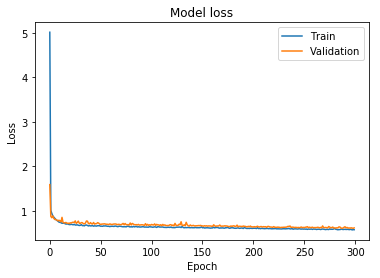

In [265]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

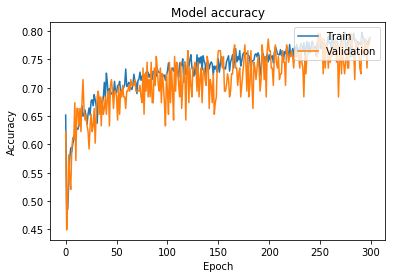

In [266]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_acc'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"
# TODO
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [267]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [268]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.6466509247648304
Test accuracy: 0.7758620669101847
